## Gaussian Driving see the Samples!

#### Imports and Data

In [4]:
import numpy as np
import matplotlib.pyplot as plt

data=np.load('data/uniform/train_size_6_tf_10.0_dt_0.1_sigma_1_9_c_0_4_set_of_gaussians_100_n_dataset_15000.npz')

h=data['potential']
z=data['density']
t=data['time']

print(t.shape)
print(h.shape)



(100,)
(15000, 100, 1)


#### Plot some samples!

In [ ]:
for sample in range(5):
    for l in range(h.shape[-1]):
        plt.plot(t,h[sample,:,l])
        plt.plot(t,z[sample,:,l])
        plt.show()
        

## Spectra analysis

#### Simple plot

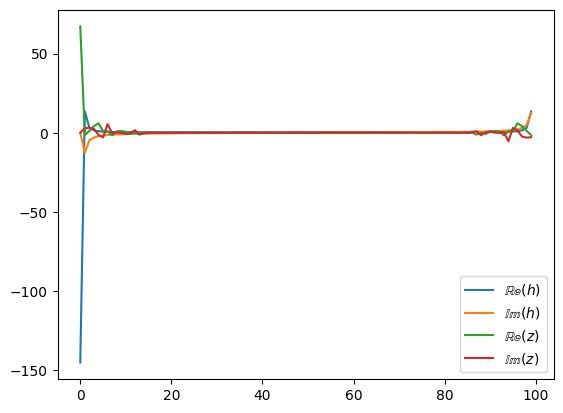

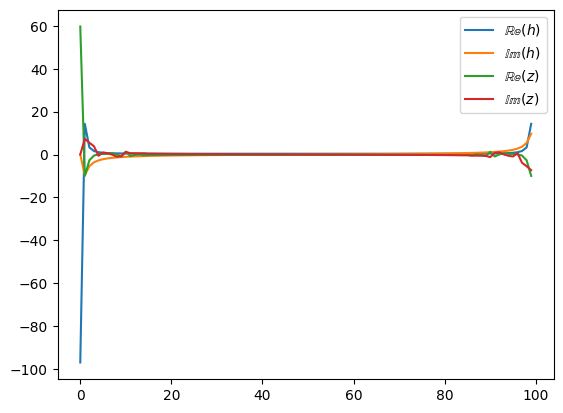

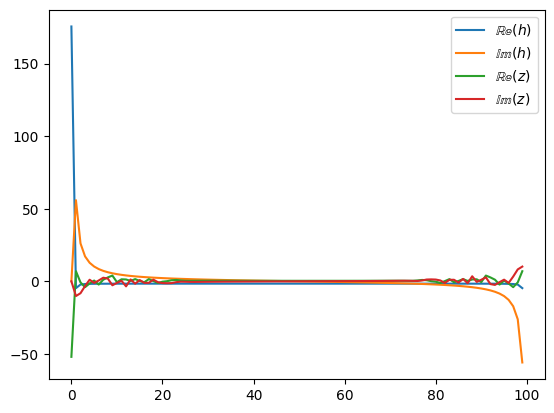

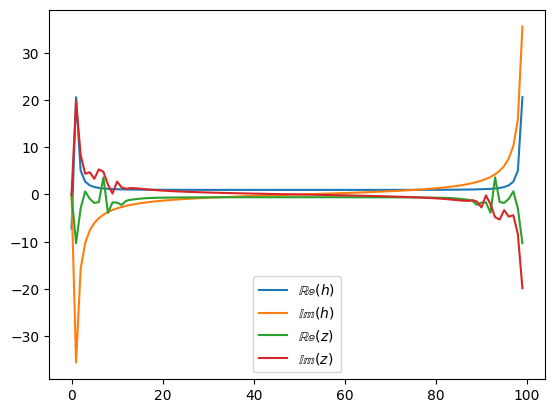

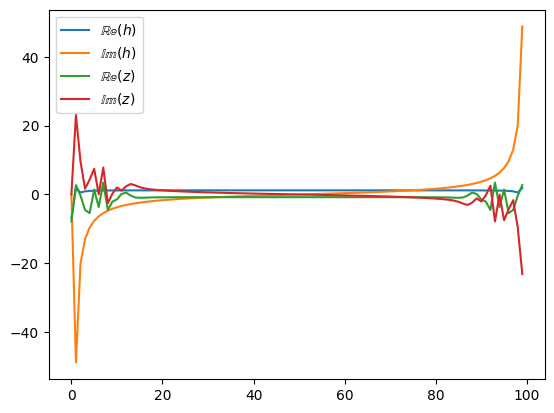

In [8]:
from scipy.fft import fft

h_f=fft(h,axis=-2)
z_f=fft(z,axis=-2)

for i in range(5):
    plt.plot(np.real(h_f[i,:,-1]),label=r'$\mathbb{Re}(h)$')
    plt.plot(np.imag(h_f[i,:,-1]),label=r'$\mathbb{Im}(h)$')
    plt.plot(np.real(z_f[i,:,-1]),label=r'$\mathbb{Re}(z)$')
    plt.plot(np.imag(z_f[i,:,-1]),label=r'$\mathbb{Im}(z)$')
    plt.legend()
    plt.show()

#### Different Time scales

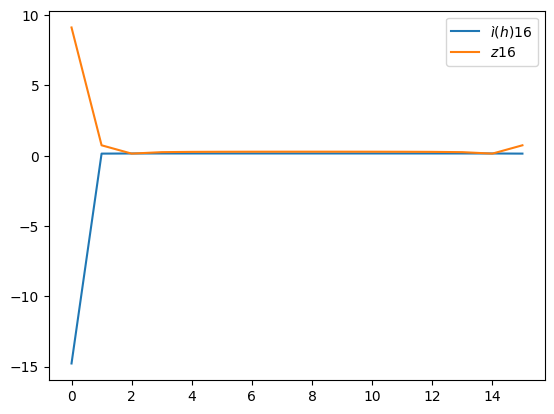

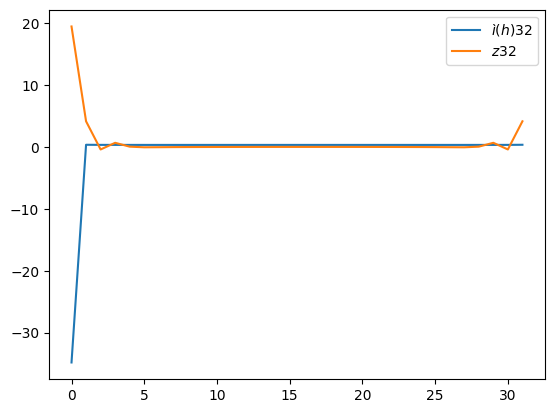

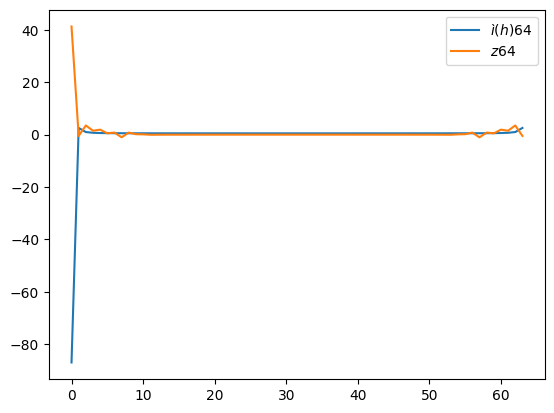

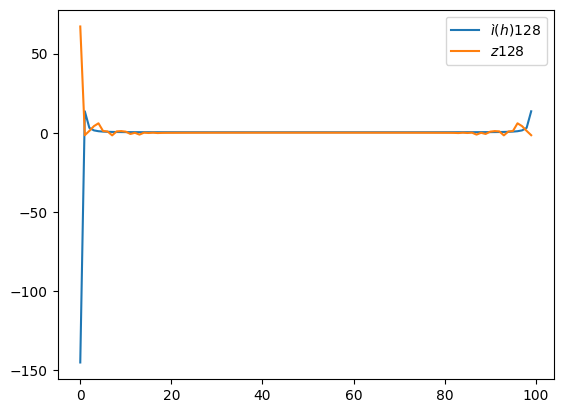

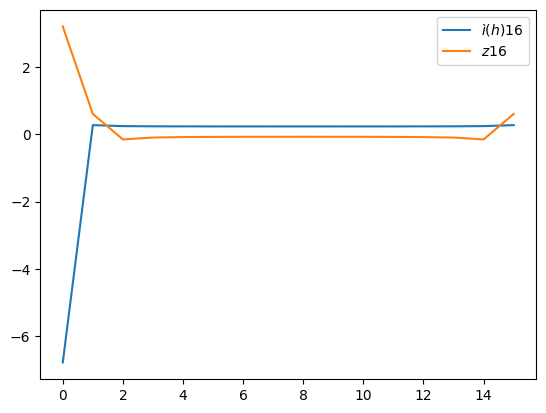

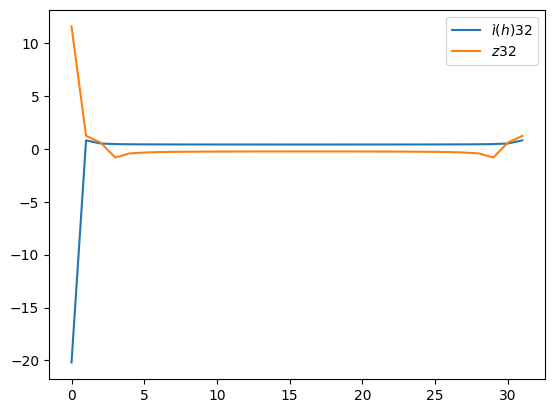

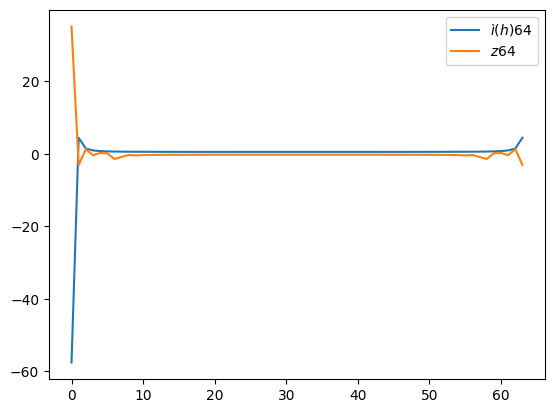

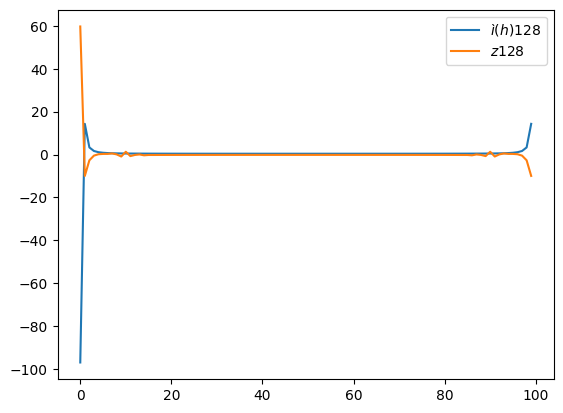

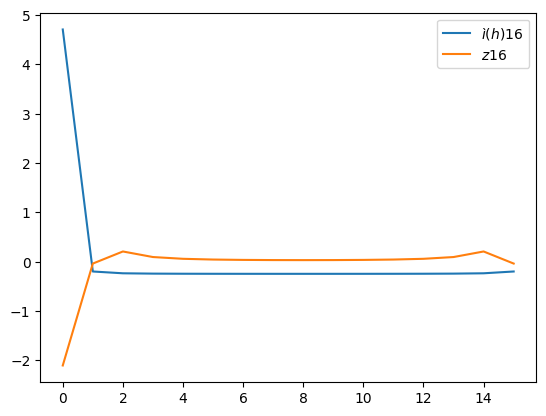

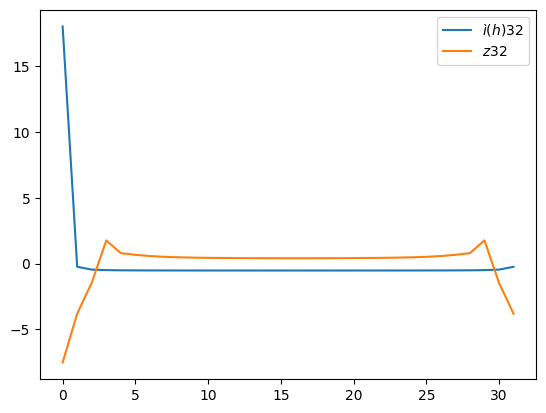

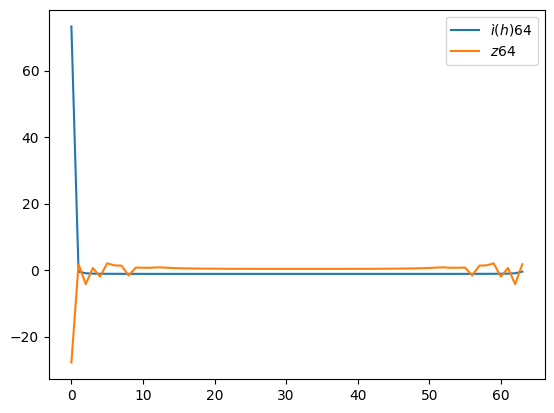

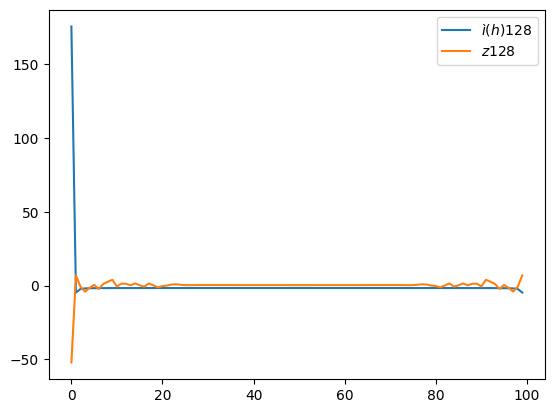

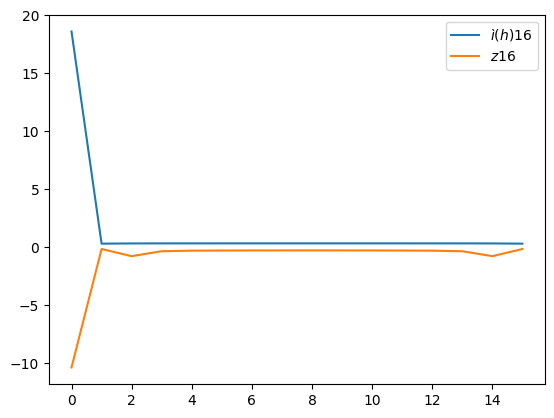

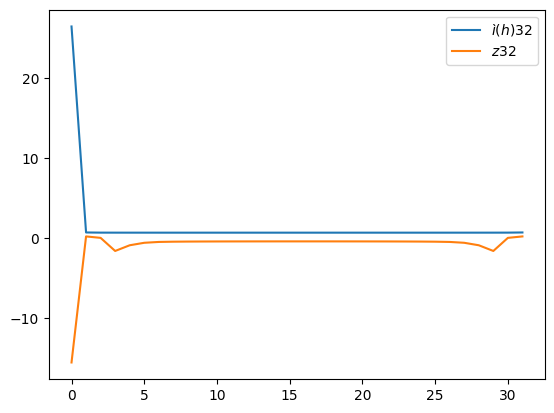

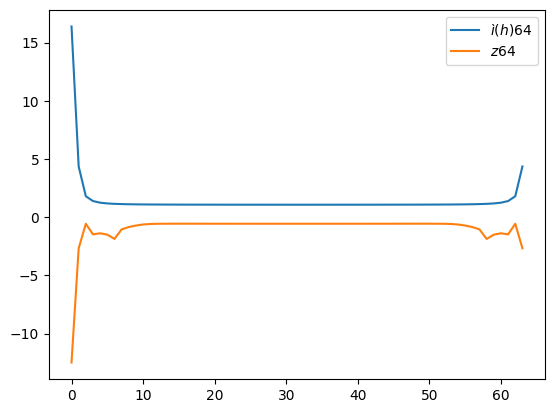

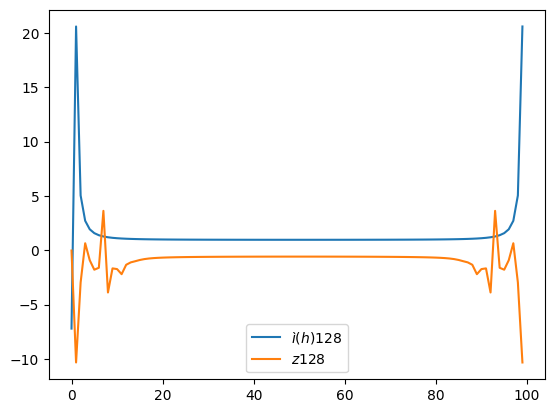

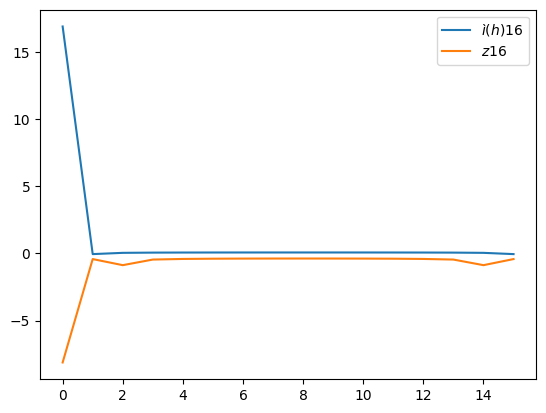

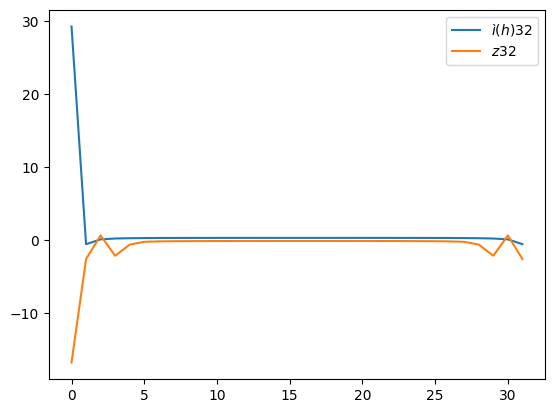

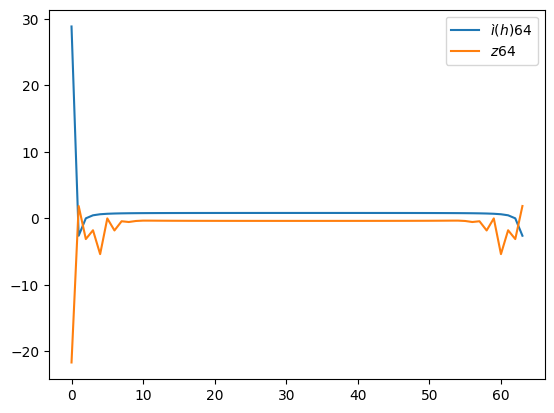

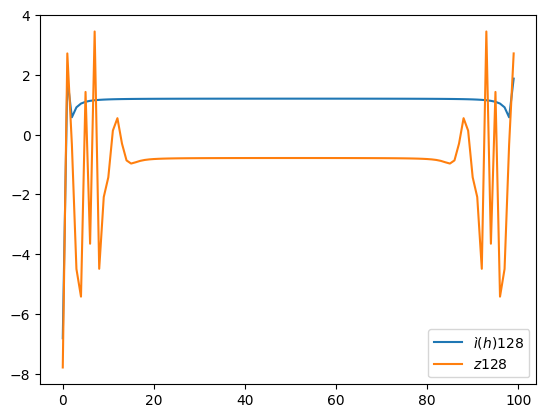

In [14]:
nt=[16,32,64,128]

for i in range(5):
    for t_fin in nt:
        h_f=fft(h[:,:t_fin,:],axis=-2)
        z_f=fft(z[:,:t_fin,:],axis=-2)
        plt.plot(np.real(h_f[i,:,-1]),label=r'$ì(h)$'+f'{t_fin}')
        #plt.plot(np.imag(h_f[i,:,-1]),label=r'$\mathbb{Im}(h)$')
        plt.plot(np.real(z_f[i,:,-1]),label=r'$z$'+f'{t_fin}')
        #plt.plot(np.imag(z_f[i,:,-1]),label=r'$\mathbb{Im}(z)$')
        plt.legend()
        plt.show()

#### Save the arranged data

In [ ]:
from src.qutip_lab.qutip_class import SpinOperator, SpinHamiltonian, SteadyStateSolver
import numpy as np
import qutip
from tqdm import tqdm, trange
from typing import Dict, List, Tuple, Union
import matplotlib.pyplot as plt
from qutip.solver import Options
import argparse

data=np.load('data/gaussian_driving/simulation_size_2_tf_10.0_dt_0.05_sigma_10_40_c_0_4.0_noise_100_n_dataset_200.npz')

h=data['potential']
z=data['density']
t=data['time']




#### Create larger datasets

In [15]:
import numpy as np
set_i=10
for i in range(set_i):
    data=np.load(f'data/uniform/trainset/train_{i+1}_size_6_tf_10.0_dt_0.1_sigma_1_9_c_0_4.0_noise_100_n_dataset_15000.npz')
    
    if i==0:
        z=data['density']
        h=data['potential']
        time=data['time']
    else:
        z=np.append(z,data['density'],axis=0)
        h=np.append(h,data['potential'],axis=0)
        
np.savez(f'data/uniform/train_size_6_tf_10.0_dt_0.1_sigma_1_9_c_0_4_set_of_gaussians_100_n_dataset_{15000*set_i}',density=z[:,:,:1],potential=h[:,:,:1],time=time)
    
    

## Gaussian driving

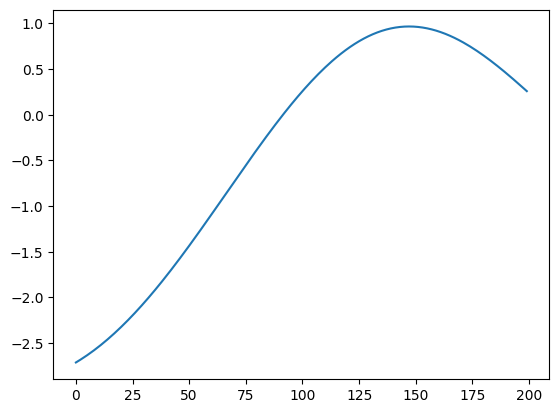

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft,ifft

sigma:float=5
tf=10
dt=0.05
t:np.ndarray=np.linspace(0,tf,int(tf/dt))
c0:float=3.
corr=c0*np.exp(-1*((t[None,:]-t[:,None])**2)/(2*sigma**2))

e,l=np.linalg.eigh(corr)
e=np.abs(e)
x=np.random.randn(int(tf/dt))
x[0]=0.

d=np.einsum('ij,j,j->i',l,np.sqrt(e),x)

plt.plot(d)
plt.show()

